# SVM and Evaluation

## [Support Vector Machines - Slides](https://github.com/cs109/2015/blob/master/Lectures/10-SVMAndEvaluation.pdf)

- a very common classifier

- **Recap** - with k-NN there is no effort in training. Predicting is very labourous because we need to look through all the data to calculate the majority vote.

#### How can we fix this?

- There must be a more efficient classifier. If we know the decision boundaries then we can quickly classify the data.

# Separating hyperplane

$$ \text{x: data point} $$
$$ \text{y: label }\epsilon \{-1,+1\} $$

![hyperplane](http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/_images/plot_sgd_separating_hyperplane_1.png)

- The solid black line is the separation between the two classes

$$ \text{w: weight vector} $$

- `w` defines the orientation of the hyperplane and can be visualized as a perpendicular vector with it's origin on the hyperplane. Called the _Orthogonal Vectors_

$$ \text{b: bias} $$

refer to the [slides](https://github.com/cs109/2015/blob/master/Lectures/10-SVMAndEvaluation.pdf) for visuals for how the parameters `w` and `b` transform the hyperplane.

We can then predict the class of a new `x` by evaluating the following formula:

$$ w^{T}x + b < 0 $$

- **unlike k-NN**, I can now let go of all the training data and just hold on to these very few parameters.
    - However, k-NN is more flexible and can handle more linear problems
    - Now we are confined to the decision boundary (i.e. a line (hyperplane))
    - Therefore, we are going to try and keep all the positive aspects of k-NN and the efficiency of a new hyperplane.

# Perceptron
![perceptron](https://cdn-images-1.medium.com/max/1600/1*n6sJ4yZQzwKL9wnF5wnVNg.png)

- this is just a way to calculate this formula $ w^{T}x + b = 0 $ in higher dimensional space.
- [Frank Rosenblatt](https://en.wikipedia.org/wiki/Frank_Rosenblatt)
- This is essentially the basis for every artificial neural network, deep learning application.

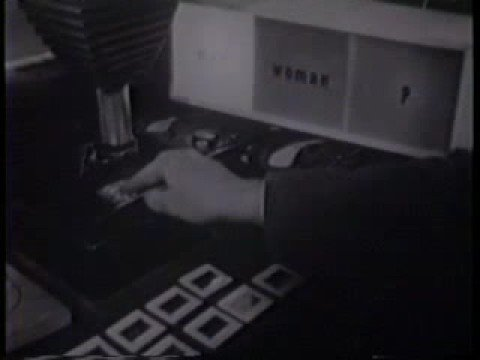

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('cNxadbrN_aI')

# The XOR Problem

## Higher Dimension Separation

- In higher dimensions we are better able to separate our data but we need to avoid the curse of higher dimensions
- We therefore find the lowest number of dimensions that can still accurately separate the data.

# Support Vector Machine

- Widely used for all sorts of classification problems
- Some people say it is the best of the shelf classifiers out there
- It's ability to to move data classes into these higher dimensions for separation is one reason SVM is so popular.
    - You still need to tune some parameters to get SVM to perform really well.
# Maximum Margin Classification
- Tries to ensure generalization to new datasets
- Shown with the dotted line in the first figure above
- The **support vectors** are the points on the maximum margin
- In theory, these **support vectors** are the only points we need to generate the same hyperplane result.
- $ x^{(i)} $ is a data point on the maximum margin and $ {x_{\perp}}^{(i)} $ is that x value perpendicularly projected onto the hyperplane. $ \gamma^{(i)} $ is then the distance between these two `x` values.

- to find $ \gamma $ we normalize `w` to a value of 1 and then compute the number of `w`s are needed to move from $ x^{(i)} \text{ to } {x_{\perp}}^{(i)} $

    - See the slides for a visual of this
$$ {x_{\perp}}^{(i)} = x^{(i)} - \gamma^{(i)} \cdot \frac{w}{\left \| w \right \|} $$

### Why do I want to know $ {x_{\perp}}^{(i)} $ ?

- because, this x value translated to the hyperplane is describable by our formula:
$$ w^{T}{x_{\perp}}^{(i)} + b = 0 $$

With some simple algebra:

$$ \gamma^{(i)} =  y^{(i)}\left (\frac{w^{T}{x_{\perp}}^{(i)} + b}{\left \| w \right \|}\right ) $$
    - We add `y` into the formula to decide between the two classes (+1|-1) from a previous slide.
    
# This is kind of odd
- It cares about the rare data points (support vectors)
- The classifier is only looking for the the points closest to the boundary between the classes.
    - An example would be trying to classify apples and oranges. SVM is concerned with the apple that looks most like an orange and vice versa. There classifier is not concerned with the ideal case of either class.
    
- $ \xi _{i} $ is the slack variable for the classifier

$$ \text{min}_{w,b,\xi } \frac{1}{2}\left \| w \right \|^{2} + C\sum_{i=1}^{n}\xi _{i} $$

And here we see our second hyperparameter $C$

# Quadratic Kernel
- Using higher dimensional space to use linear computation for the decision boundary

## Polynomial

## Radial basis function (RBF)

- Each kernel has its own hyperparameter that needs to be tuned.

# Prediction

- Prediction speed depends on number of support vectors

## Kernel Trick for SVMs
- Arbitrary many dimensions
- Little computational cost
- Maximal margin helps with curse of dimensionality

# Tips and Tricks
- SVMs are not scale invariant
- Check if your library normalizes by default
- Normalize your data
    - mean: 0, std: 1
    - map to \[0,1\] or \[-1,1\]
- Normalize test set in same way!

- RBF kernel is a good default
- For parameters try exponential sequences
- Read:
    - Chih-Wei Hsu et al., "[A Practical Guide to Support Vector Classification](https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf)"
    
# SVM vs. k-NN
- With k-NN we need to keep all the training data. SVM we only care about the support vectors.
- With k-NN we only have k to tune. SVM we have C and the parameter of our kernel.
    - Which makes SVM more complicated but we gain the max. margin and kernel tricks.

# Parameter Tuning

## Train vs. Test Error

![trainerror](https://www.researchgate.net/profile/Jorge_Santos30/publication/37655851/figure/fig10/AS:669570926911493@1536649557125/Train-error-versus-test-error-and-the-early-stopping-rule.png)
- With cross validation we are trying to find the 'sweet spot.'

# Grid Search Cross Validation
![gamma](http://scikit-learn.org/stable/_images/sphx_glr_plot_rbf_parameters_002.png)

# Error Measures - Confusion Matrix
![confusion](https://www.researchgate.net/profile/MOHD_NIZAR_Hamidon/publication/274408179/figure/fig4/AS:294691712061446@1447271387589/Typical-confusion-matrix-wherein-TP-true-positive-FN-false-negative-FP-false.png)

## TPR and FPR
- True Positive Rate:
$$ \frac{tp}{tp+fn} $$
- False Positive Rate:
$$ \frac{fp}{fp+tn} $$

# Reciever Operating Characteristic (ROC) curve
![ROC](https://www.researchgate.net/profile/Ramkrishna_Mitra/publication/271270751/figure/fig10/AS:272659820838918@1442018575187/Scatter-plot-of-false-positive-rate-and-true-positive-rate-of-MBSTAR-and-other-algorithms.png)

- Very popular summary statistic is the area under your ROC curve.
    - One for your testing and one for training
    
# Precision Recall
- Recall (just a renaming of the TPR):
    - If I pick a random positive example, what is the probability of making the right prediction?
$$ \frac{tp}{tp+fn} $$
- Precision:
    - If I take a positive prediction example, what is the probability that it is indeed a positive example?
$$ \frac{tp}{tp+fp} $$

## Precision Recall Curve
![precision](https://qph.fs.quoracdn.net/main-qimg-ddd56eeeae45bcd95093859b87454e73)

#### Compared to ROC:
![ROC](http://www.chioka.in/wp-content/uploads/2014/04/sample-ROC-curve.png)


# F-measure
- The summary statistic for the PR curve is the harmonic mean or F-measure
    - Weighted average of precision and recall
$$ F_{\beta} = \frac{(\beta^{2}+1) \cdot P \cdot R}{\beta^{2} \cdot P + R} $$

- Usual case: $ \beta = 1 $
- Increasing $ \beta $ allocates weight to recall

# One vs All

## For multi class scenarios

- Train n classifier for n classes
- Take classification with greatest margin
- Slow training

# One vs One
- Train n(n-1)/2 classifiers
- Take majority vote
- Fast training

# Decision Trees And Random Forest

## [Slides](https://github.com/cs109/2015/blob/master/Lectures/11-DecisionTreesAndRandomForest.pdf)

[Elements of Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)

